In [57]:
import numpy as np
from scipy.signal import cspline2d
import imageio as img
from PIL import Image

# PCNN


In [63]:
class PCNN:
    
    f, l, t1, t2, beta = 0.9, 0.8, 0.8, 50.0, 0.2
    
    def __init__ (self, dim):
        
        """Convert temperature in Fahrenheit to kelvin.
    
        Parameters:
        -----------
        fahr: int or float
            The tempature in Fahrenheit.

        Returns:
        -----------
        kelvin : int or float
            The temperature in kelvin.
        """
        
        self.F = np.zeros(dim, float)
        self.L = np.zeros(dim, float)
        self.Y = np.zeros(dim, float)
        self.T = np.zeros(dim, float) + 0.0001
        
    def iterate (self, stim):
        
        """Convert temperature in Fahrenheit to kelvin.
    
        Parameters:
        -----------
        fahr: int or float
            The tempature in Fahrenheit.

        Returns:
        -----------
        kelvin : int or float
            The temperature in kelvin.
        """
        
        if self.Y.sum() > 0:
            work = cspline2d(self.Y.astype(float), 90)
        else:
            work = np.zeros(self.Y.shape, float)
            
        self.F = self.f * self.F + stim + 8 * work
        self.L = self.l * self.L + 8 * work
        U = self.F * (1 + self.beta * self.L)
        self.Y = U > self.T
        self.T = self.t1 * self.T + self.t2 * self.Y + 0.1
        
    def a2i (self, indata):
        
        """Convert temperature in Fahrenheit to kelvin.
    
        Parameters:
        -----------
        fahr: int or float
            The tempature in Fahrenheit.

        Returns:
        -----------
        kelvin : int or float
            The temperature in kelvin.
        """
        
        mg = Image.new( 'L', indata.transpose().shape)
        mn = indata.min()
        a = indata - mn
        mx = a.max()
        a = a*256./mx
        mg.putdata(a.ravel())
        return mg
    

In [64]:
data = np.zeros((360, 360))
data[120:160, 120:240] = 1
data[160:240, 160:200] = 1
data.shape

(360, 360)

In [72]:
net = PCNN(data.shape)
Y = []
for i in range(20):
    net.iterate(data)
    Y.append( net.Y + 0)
    


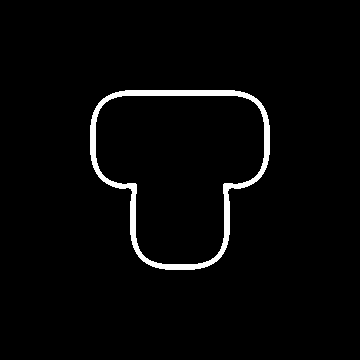

In [74]:
net.a2i(Y[5])